Machine Learning Terapan - Rama Syailana Dewa - 

## Predictive Analytics - Klasifikasi Obesitas Berdasarkan Gaya Hidup

### Deskripsi Proyek
Proyek ini berfokus pada bidang kesehatan dan machine learning untuk mengklasifikasikan tingkat obesitas berdasarkan data gaya hidup dan kesehatan. Dataset yang digunakan mencakup berbagai variabel, seperti pola makan, aktivitas fisik, riwayat keluarga, serta pengukuran fisik (misalnya, usia, tinggi badan, dan berat badan). Tujuan dari proyek ini adalah untuk mengembangkan model prediktif yang dapat mengidentifikasi individu dengan risiko obesitas tinggi secara akurat. Hasil dari model ini diharapkan dapat digunakan sebagai dasar dalam intervensi kesehatan dan pencegahan penyakit kronis yang terkait dengan obesitas. Dua atau lebih model machine learning akan diuji, dan model dengan performa terbaik akan dipilih berdasarkan evaluasi metrik seperti akurasi, precision, recall, F1 score, dan confusion matrix.

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### 2. Data Understanding
Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas data tersebut.

#### 2.1 Data Loading
Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami

*dataset yang digunakan dalam proyek ini:*

https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset

In [2]:
df = pd.read_csv("data\ObesityDataSet_raw_and_data_sinthetic.csv")

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\2605217257.py:1: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_csv("data\ObesityDataSet_raw_and_data_sinthetic.csv")


**Insight**

Memuat dataset obesitas menggunakan fungsi pd.read_csv(). Data diambil dari file CSV yang berisi 2111 catatan dan 17 fitur. Pemeriksaan awal dilakukan untuk melihat beberapa baris pertama dan terakhir guna memastikan data berhasil dimuat dengan benar.

#### 2.2 Exploratory Data Analysis

Eksploratori data merupakan langkah pertama dalam menganalisa data yang bertujuan untuk mengenali ciri - ciri data, menemukan pola atau ketidakwajaran, dan menguji hipotesis yang ada. Tahap ini biasanya melibatkan penggunaan teknik statistik dan visualisasi grafik guna membantu dalam pemahaman data.

##### 2.2.1 EDA - Deskripsi Variabel

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.47,yes,yes,3.0,3.0,Sometimes,no,2.86,no,1.03,0.714,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### 2.2.2 EDA - Menangani Missing Value dan Menangani Outliers

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(24)

In [10]:
df =df.drop_duplicates()

**Insight**

Dilakukan pemeriksaan missing values dan duplikasi. Hasil pengecekan menunjukkan bahwa tidak ada missing values, namun terdapat beberapa duplikat yang kemudian dihapus untuk menjaga keunikan data.

In [11]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Text(0.5, 1.0, 'Weight Distribution')

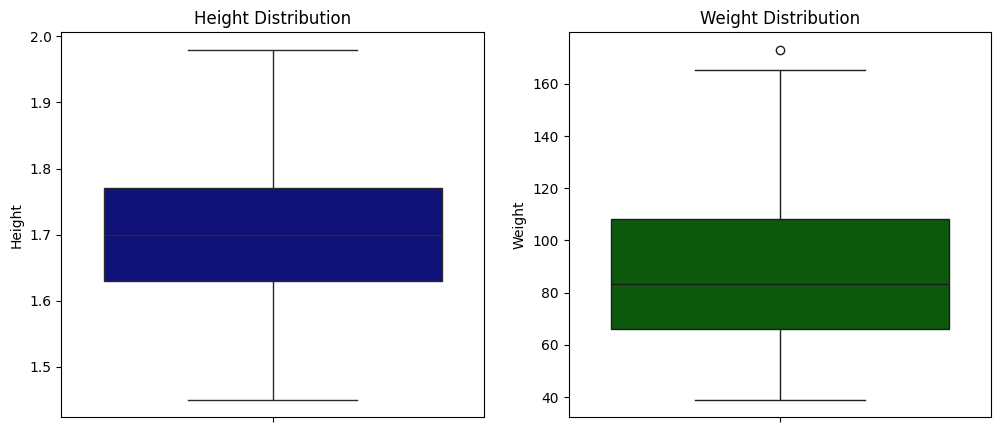

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Height'], ax=axes[0], color='darkblue')
sns.boxplot(y=df['Weight'], ax=axes[1], color='darkgreen')
axes[0].set_title('Height Distribution')
axes[1].set_title('Weight Distribution')

#### 2.2.3 EDA - Univariate Analysis

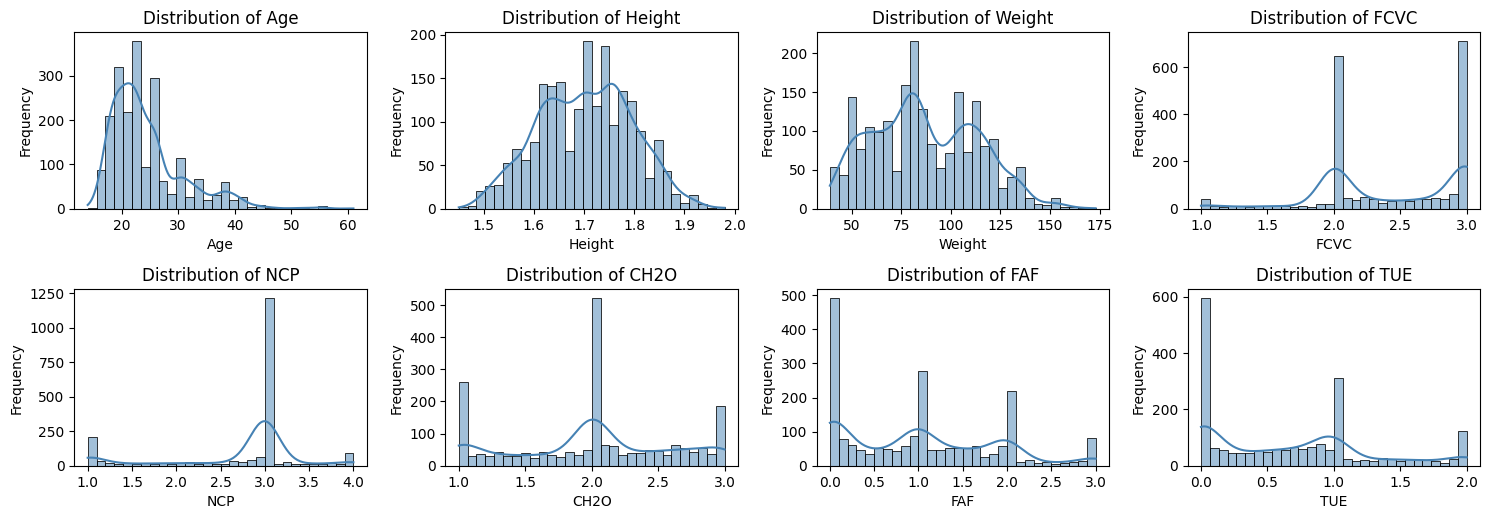

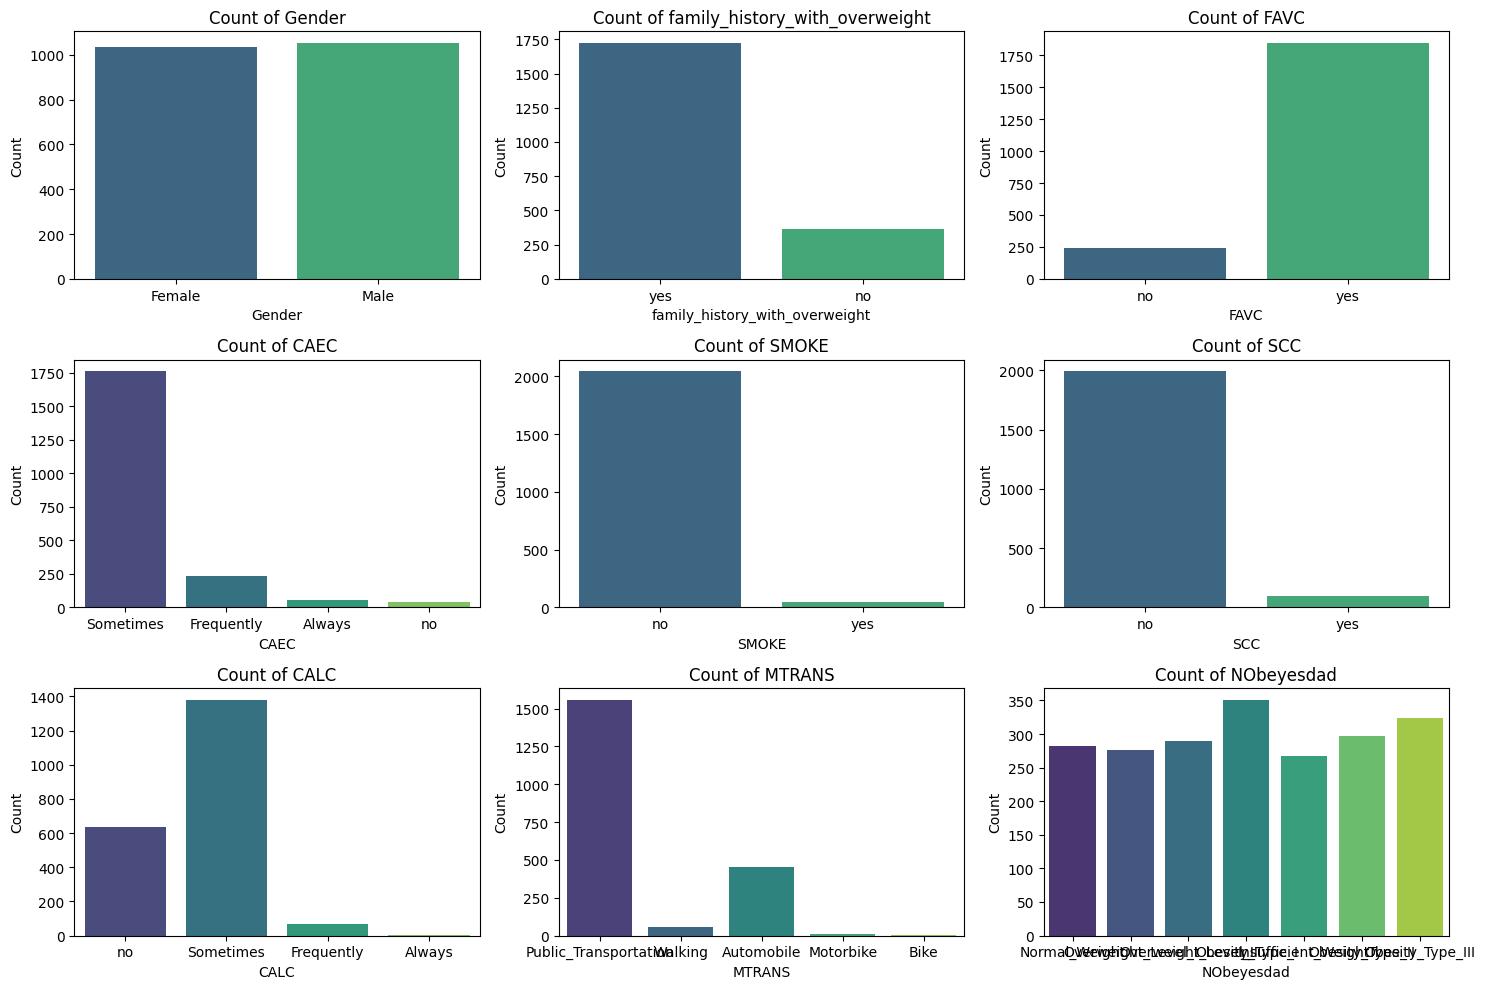

In [13]:
# 2.1 Univariate Analysis
# -------------------------
# Visualisasi distribusi variabel numerik dengan histogram
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Visualisasi count plot untuk variabel kategorikal
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=col, data=df, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()



#### 2.2.4 Multivariate Analysis

Text(0.5, 1.0, 'Fast Food Consumption vs. Obesity Levels')

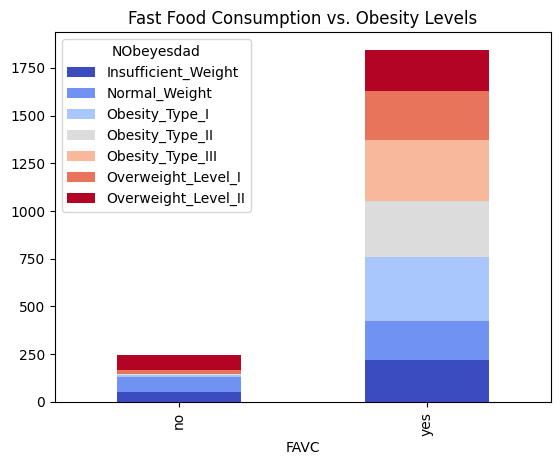

In [14]:
pd.crosstab(df['FAVC'], df['NObeyesdad']).plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Fast Food Consumption vs. Obesity Levels')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2876\3556807641.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FCVC', y='NObeyesdad', data=df, palette='muted')


Text(0.5, 1.0, 'Vegetable Consumption vs. Obesity Levels')

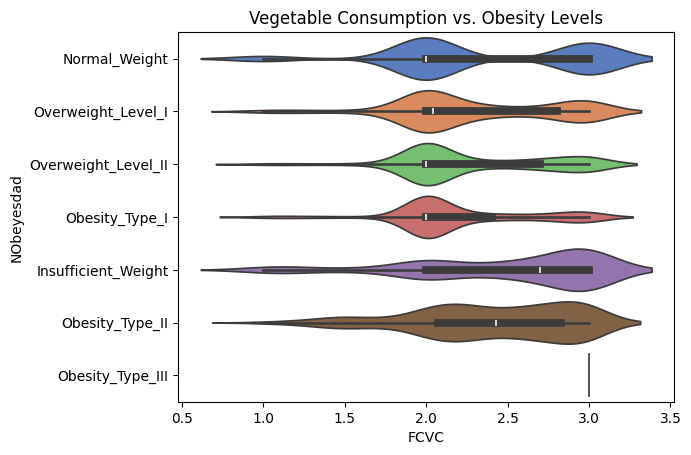

In [15]:
sns.violinplot(x='FCVC', y='NObeyesdad', data=df, palette='muted')
plt.title('Vegetable Consumption vs. Obesity Levels')

Text(0.5, 1.0, 'Meal Frequency vs. Weight')

c:\Users\LENOVO\bangkit\courses\dicoding\machinelarningterapan\Proyek Pertama - V1\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\LENOVO\bangkit\courses\dicoding\machinelarningterapan\Proyek Pertama - V1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


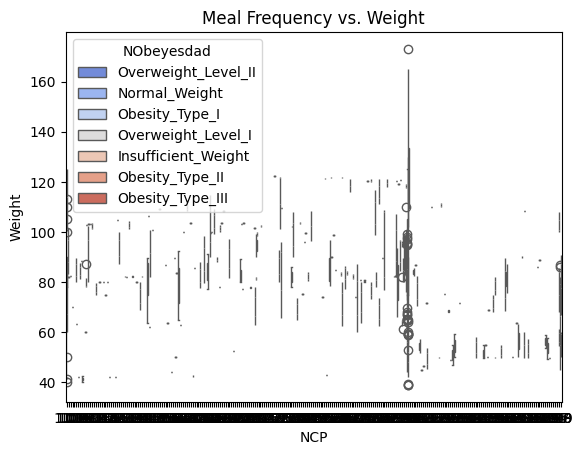

In [16]:
sns.boxplot(x='NCP', y='Weight', data=df, hue='NObeyesdad', palette='coolwarm')
plt.title('Meal Frequency vs. Weight')

<Axes: xlabel='CALC', ylabel='Weight'>

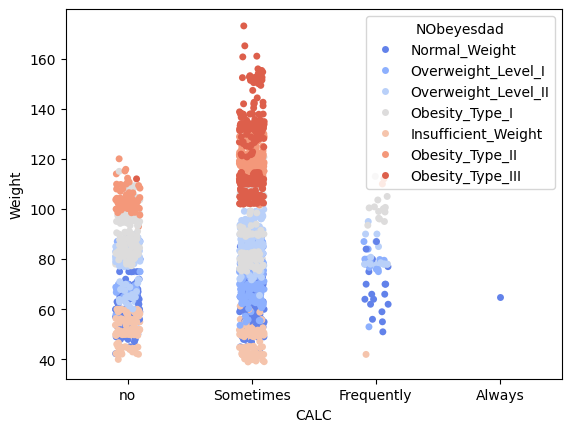

In [17]:
sns.stripplot(x='CALC', y='Weight', hue='NObeyesdad', data=df, palette='coolwarm', jitter=True)


<Axes: xlabel='FAF', ylabel='Weight'>

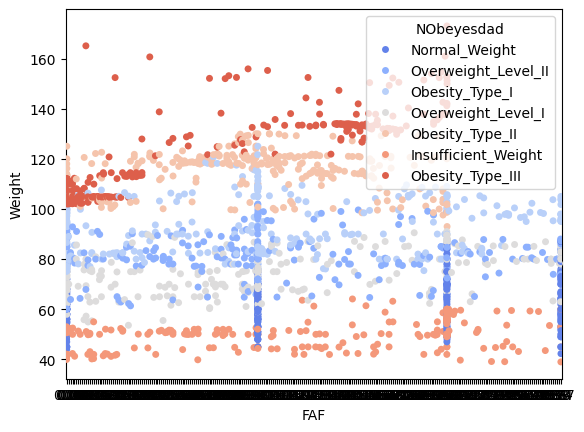

In [18]:
sns.stripplot(x='FAF', y='Weight', hue='NObeyesdad', data=df, jitter=True, palette='coolwarm')

<Axes: xlabel='MTRANS', ylabel='count'>

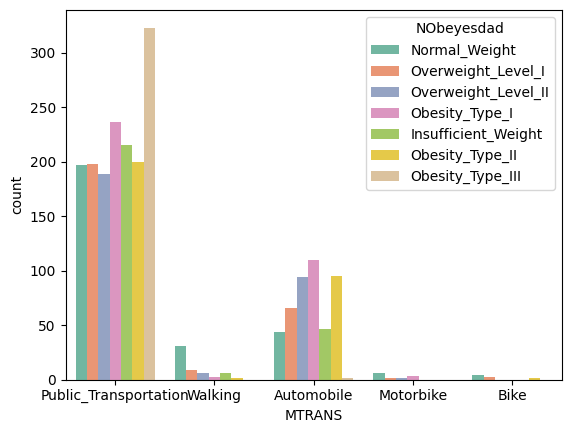

In [19]:
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df, palette='Set2')

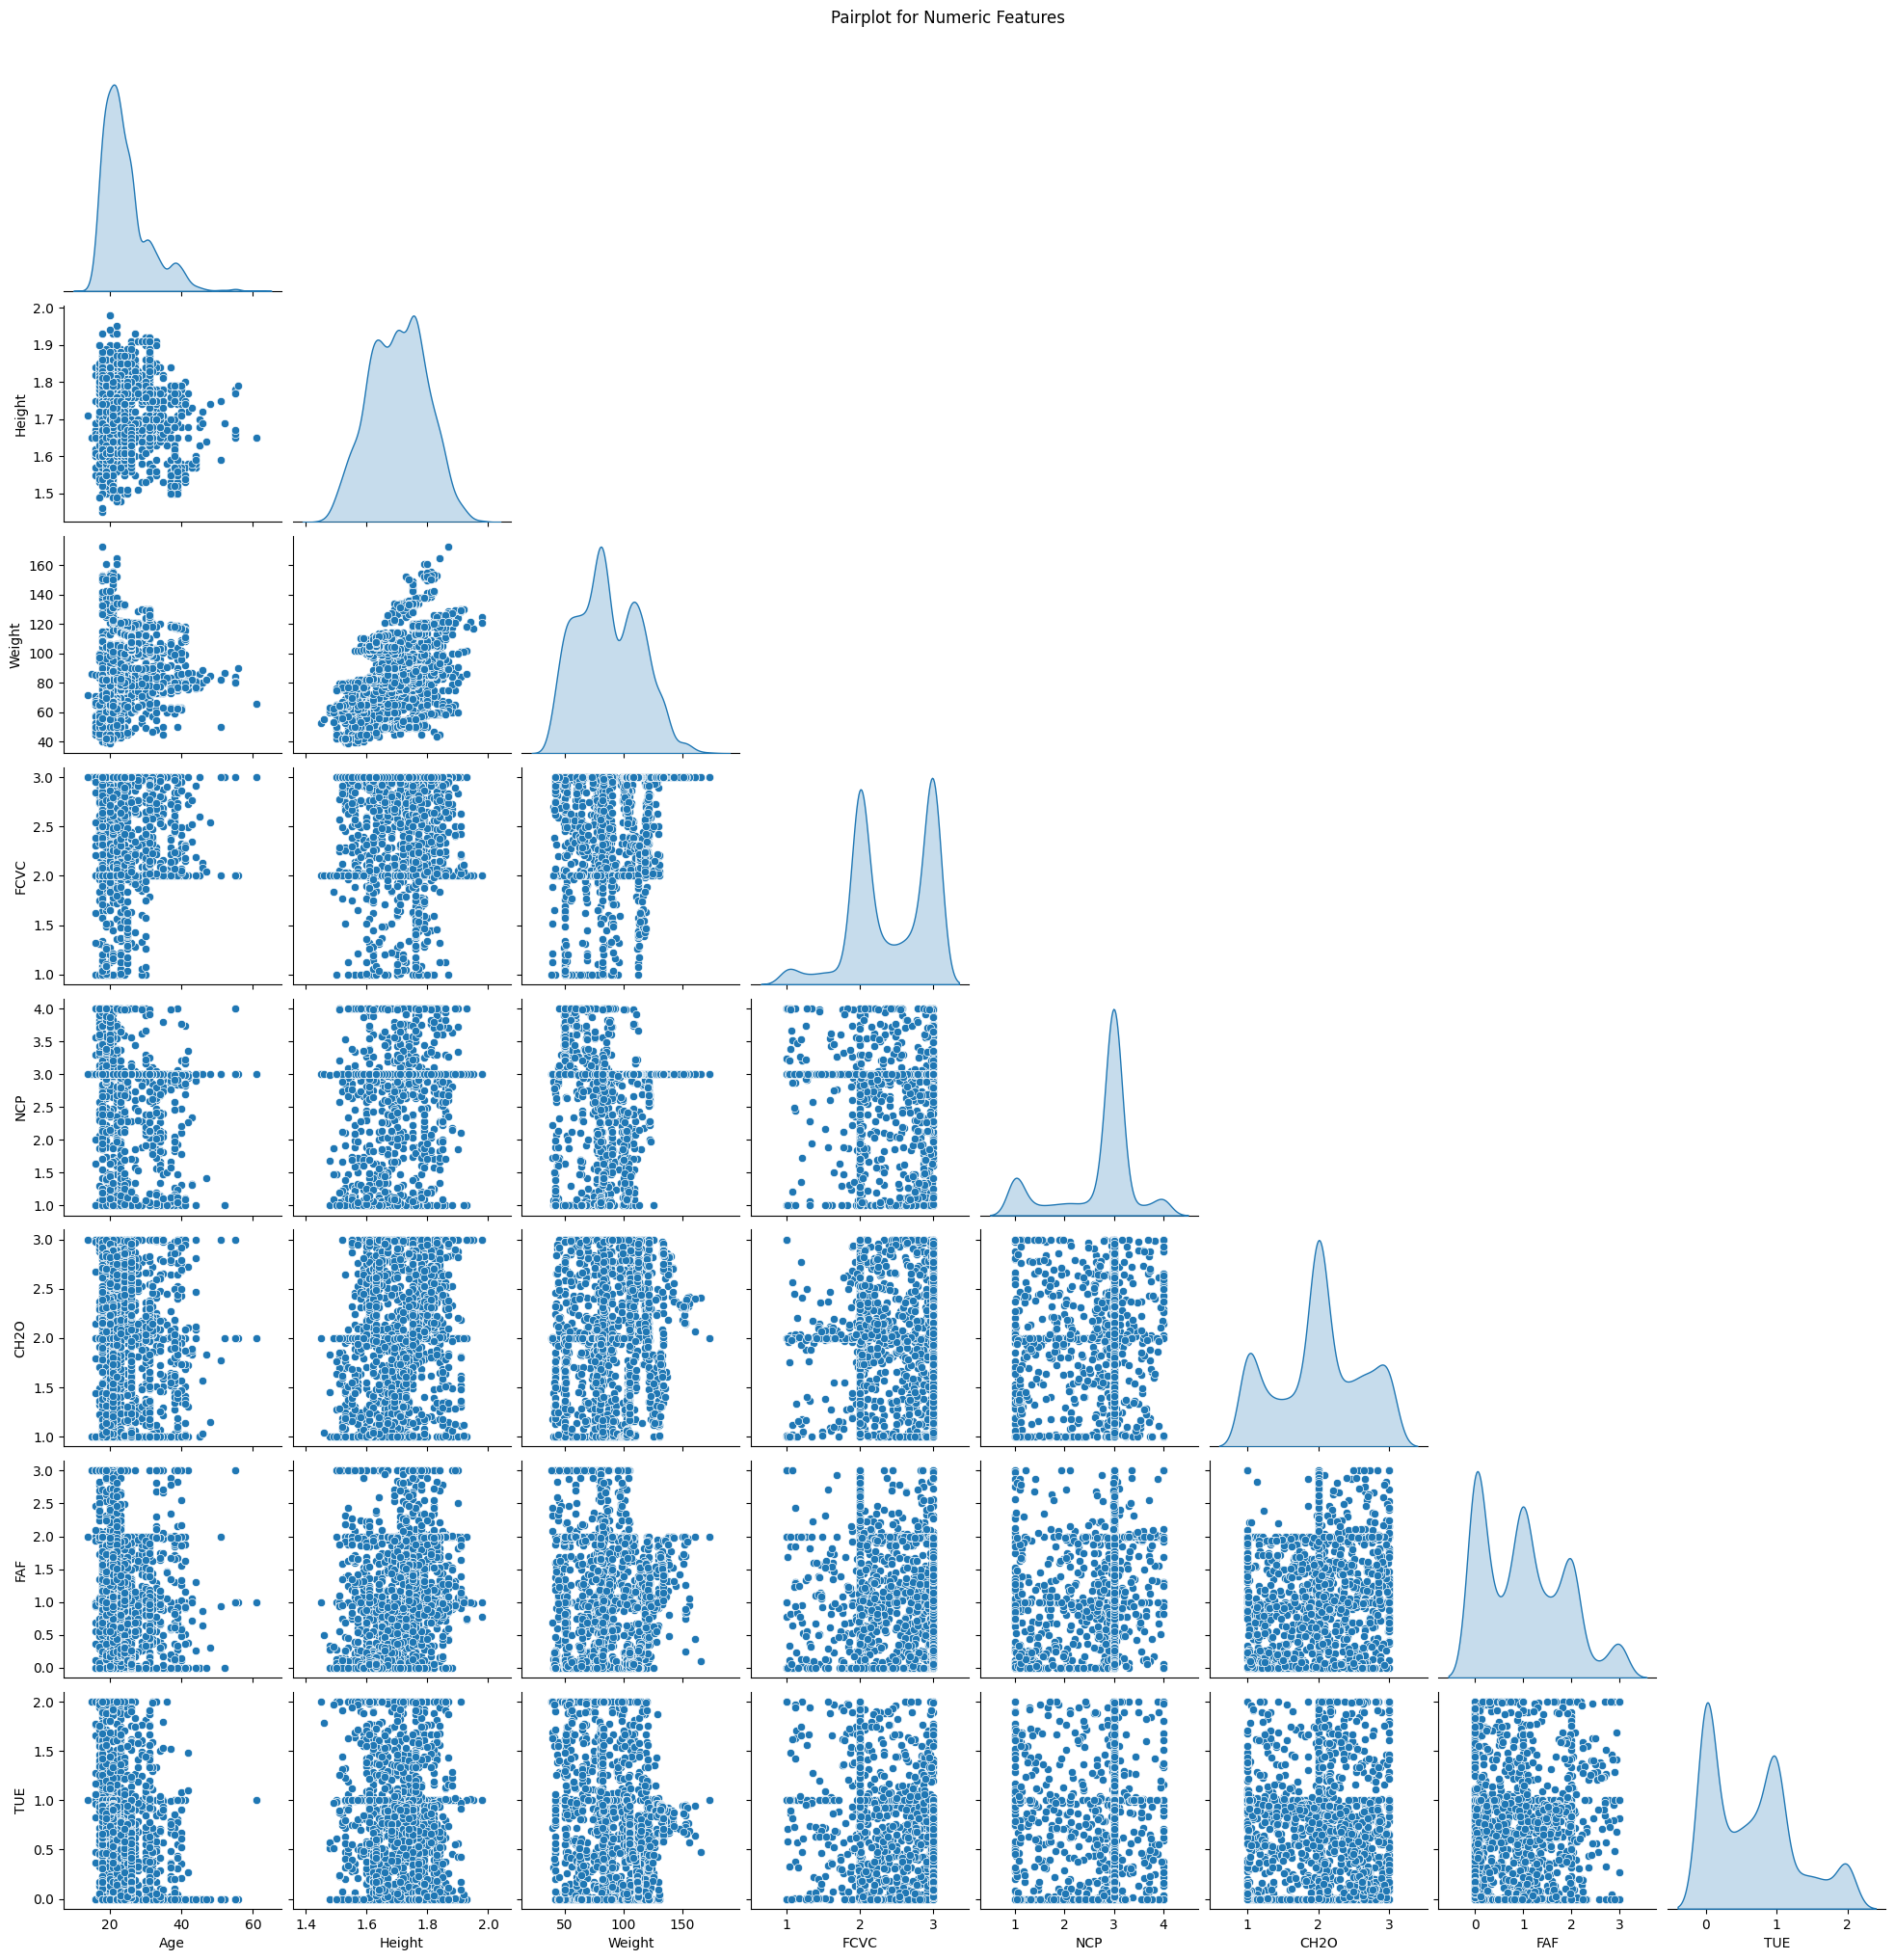

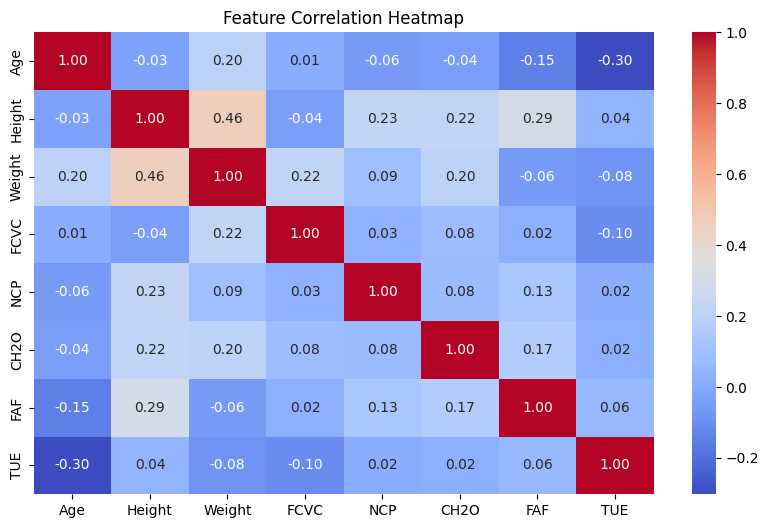

In [20]:
# 2.2 Multivariate Analysis
# ---------------------------
# Visualisasi pairplot untuk melihat hubungan antara variabel numerik
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot for Numeric Features", y=1.02)
plt.show()

# Visualisasi Heatmap korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Insight**

Analisis eksplorasi data dilakukan untuk memahami distribusi dan hubungan antar variabel. Dari histogram, terlihat sebaran nilai pada setiap variabel numerik, sedangkan count plot menunjukkan frekuensi kategori pada variabel kategorikal. Insight penting yang diperoleh antara lain: tidak ada missing value, distribusi data cukup simetris pada sebagian besar fitur, dan terdapat beberapa outlier yang mungkin memerlukan perhatian lebih lanjut.

### 3. Data Preparation
Persiapan data adalah langkah yang dilakukan untuk mengolah data agar siap digunakan dalam tahap pembuatan model Machine Learning.

#### 3.1 Encoding Variabel Kategorikal

In [21]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["family_history_with_overweight"] = le.fit_transform(df["family_history_with_overweight"])
df["FAVC"] = le.fit_transform(df["FAVC"])
df["CAEC"] = le.fit_transform(df["CAEC"])
df["SMOKE"] = le.fit_transform(df["SMOKE"])
df["SCC"] = le.fit_transform(df["SCC"])
df["CALC"] = le.fit_transform(df["CALC"])
df["MTRANS"] = le.fit_transform(df["MTRANS"])
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

#### 3.2 Pemisahan Fitur Target

In [22]:
# Define x and y before encoding
x = df.drop(["NObeyesdad"], axis=1)  
y = df["NObeyesdad"]

# Initialize label encoder
le = LabelEncoder()

# Encode only categorical columns
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype.name == 'category':  
        x[col] = le.fit_transform(x[col])

print("Categorical encoding completed!")


Categorical encoding completed!


In [23]:
print(x.dtypes)

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
dtype: object


In [24]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Identify categorical columns (bins)
categorical_cols = [col for col in x.columns if x[col].dtype.name == 'category']

# Convert categorical columns to numeric
for col in categorical_cols:
    x[col] = le.fit_transform(x[col])

**Insight**

Mengubah variabel kategorikal ke format numerik menggunakan LabelEncoder

#### 3.3 Train-Test-Split

In [25]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Standardization
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#### 3.4 Standarisasi

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
print(x_train.dtype)  

float64


**Insight**

menstandarisasi variabel numerik dengan StandardScaler. Transformasi ini penting agar model machine learning dapat memproses semua data secara konsisten.

#### 4. Model Development
Pengembangan model adalah fase di mana algoritma machine learning diterapkan untuk menyelesaikan permasalahan yang telah diidentifikasi pada tahap pemahaman bisnis.

In [28]:
# Define models dictionary
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Verifikasi dictionary model
print("Defined Models:")
print(models)


Defined Models:
{'Random Forest Classifier': RandomForestClassifier(), 'Decision Tree Classifier': DecisionTreeClassifier(), 'Ada Boost Classifier': AdaBoostClassifier(), 'KNN': KNeighborsClassifier(), 'Gradient Boosting Classifier': GradientBoostingClassifier(), 'Logistic Regression': LogisticRegression(max_iter=1000)}


In [29]:

# Dictionary untuk menyimpan performa masing-masing model
results = {}

# Loop untuk training dan evaluasi setiap model
for name, model in models.items():
    # Training model
    model.fit(x_train, y_train)
    
    # Prediksi pada data testing
    y_pred = model.predict(x_test)
    
    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Simpan hasil evaluasi pada dictionary
    results[name] = {
       "accuracy": acc,
       "precision": prec,
       "recall": rec,
       "f1_score": f1,
       "confusion_matrix": cm
    }
    
    # Print hasil evaluasi untuk tiap model
    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("  Confusion Matrix:")
    print(cm)

# Menentukan model terbaik berdasarkan akurasi (atau metrik lain sesuai kebutuhan)
best_model_name = max(results, key=lambda x: results[x]["accuracy"])
print(f"\nBest Model by Accuracy: {best_model_name}")




Random Forest Classifier:
  Accuracy: 0.9540
  Precision: 0.9550
  Recall: 0.9540
  F1 Score: 0.9543
  Confusion Matrix:
[[70  4  0  0  0  0  0]
 [ 2 69  0  0  0  5  0]
 [ 0  0 83  0  0  0  2]
 [ 0  0  0 82  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  6  0  0  0 63  2]
 [ 0  2  1  0  0  0 54]]

Decision Tree Classifier:
  Accuracy: 0.9425
  Precision: 0.9422
  Recall: 0.9425
  F1 Score: 0.9422
  Confusion Matrix:
[[69  5  0  0  0  0  0]
 [ 6 65  0  0  0  4  1]
 [ 0  0 80  2  1  0  2]
 [ 0  0  2 80  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  2  0  0  0 68  1]
 [ 0  0  4  0  0  0 53]]


c:\Users\LENOVO\bangkit\courses\dicoding\machinelarningterapan\Proyek Pertama - V1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Ada Boost Classifier:
  Accuracy: 0.3812
  Precision: 0.1986
  Recall: 0.3812
  F1 Score: 0.2596
  Confusion Matrix:
[[ 0 74  0  0  0  0  0]
 [ 0 51  6  0  0  0 19]
 [ 0  0 66  0 19  0  0]
 [ 0  0  8  0 74  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0 12 27  0  0  0 32]
 [ 0  4 48  0  0  0  5]]

KNN:
  Accuracy: 0.8065
  Precision: 0.8024
  Recall: 0.8065
  F1 Score: 0.7972
  Confusion Matrix:
[[67  6  0  0  0  0  1]
 [24 30  9  2  0  3  8]
 [ 1  3 74  1  1  2  3]
 [ 0  0  1 81  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 1  7  8  1  0 48  6]
 [ 1  4  5  1  0  2 44]]

Gradient Boosting Classifier:
  Accuracy: 0.9655
  Precision: 0.9659
  Recall: 0.9655
  F1 Score: 0.9656
  Confusion Matrix:
[[69  5  0  0  0  0  0]
 [ 2 70  0  0  0  4  0]
 [ 0  0 84  0  0  0  1]
 [ 0  0  1 81  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  2  0  0  0 67  2]
 [ 0  0  0  0  0  1 56]]

Logistic Regression:
  Accuracy: 0.8582
  Precision: 0.8618
  Recall: 0.8582
  F1 Score: 0.8563
  Confusion Matrix:
[[70  4  0  0  0  0  0]
 [13 47

**Insight**

Berbagai model dikembangkan untuk mengklasifikasikan tingkat obesitas. Model-model yang digunakan antara lain Random Forest, Decision Tree, AdaBoost, KNN, Gradient Boosting, dan Logistic Regression. Evaluasi dilakukan dengan menghitung metrik seperti accuracy, precision, recall, F1 score, dan confusion matrix. Model Gradient Boosting menunjukkan performa terbaik dengan akurasi tertinggi, yang mendukung keandalan model dalam membantu identifikasi individu berisiko tinggi.

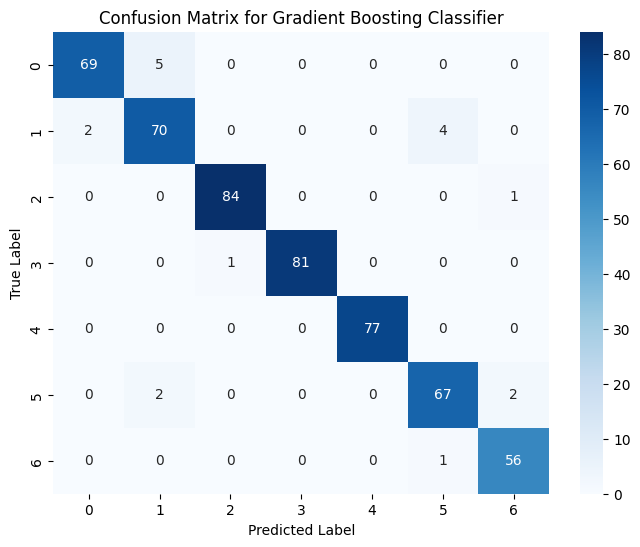

In [30]:
# Visualisasi Confusion Matrix untuk model terbaik
best_cm = results[best_model_name]["confusion_matrix"]

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Insight**

Hasil evaluasi model divisualisasikan menggunakan heatmap untuk confusion matrix dan bar chart untuk perbandingan akurasi antar model. Visualisasi ini memudahkan analisis perbandingan kinerja setiap model, sehingga model dengan performa terbaik dapat diidentifikasi secara objektif.

**Conclusion**
Evaluasi model dilakukan untuk menentukan model yang paling sesuai dengan tujuan bisnis. Hasil evaluasi menunjukkan bahwa:

- Gradient Boosting Classifier memiliki akurasi tertinggi (sekitar 96.55%) serta metrik evaluasi lain yang sangat baik, menjadikannya kandidat terbaik untuk prediksi tingkat obesitas.
- Model lain seperti Random Forest dan Decision Tree juga menunjukkan performa yang baik, namun sedikit di bawah model Gradient Boosting.
- Ada Boost Classifier dan KNN menunjukkan performa yang lebih rendah dan tidak konsisten.

Hasil evaluasi mendukung tujuan bisnis untuk mengidentifikasi individu berisiko tinggi dan mendukung pengambilan keputusan berbasis data. Proyek ini memberikan dasar untuk mengembangkan sistem pendukung keputusan yang dapat meningkatkan efektivitas intervensi dan penanganan obesitas secara profesional.